# PyEarthScience:  Python examples for Earth Scientists

## contour plots

### Using PyNGL

#### Contour plot with
   - curvilinear data
   - colormap
   - draw edges


In [1]:
import Ngl,Nio

Open the file and read variables.

In [2]:
#--  define variables
diri   = "/Users/k204045/NCL/general/data/new_data/" #-- data directory
fname  = "tos_ocean_bipolar_grid.nc"          #-- curvilinear data 

#--  open file and read variables
f      = Nio.open_file(diri + fname,"r")
var    = f.variables["tos"][0,:,:]            #-- first time step, reverse latitude
lat2d  = f.variables["lat"][:,:]              #-- 2D latitudes 
lon2d  = f.variables["lon"][:,:]              #-- 2D longitudes

Open a workstation, here x11 window.

In [3]:
#-- open a workstation
wkres                 =  Ngl.Resources()      #-- generate an resources object for workstation
wks_type              = "png"                 #-- output type
wks                   =  Ngl.open_wks(wks_type,"plot_curvilinear_contour_PyNGL",wkres)  #-- open workstation

Set resources.

In [4]:
#-- set resources
res                   =  Ngl.Resources()      #-- generate an resources object for plot

res.vpWidthF          =  0.94                 #-- width of viewport
res.vpHeightF         =  0.9                  #-- height of viewport

res.cnFillOn          =  True                 #-- turn on contour fill
res.cnLinesOn         =  False                #-- don't draw contour lines
res.cnLineLabelsOn    =  False                #-- don't draw line labels
res.cnFillMode        = "CellFill"            #-- change contour fill mode
res.cnCellFillEdgeColor =  "black"            #-- edges color
res.cnCellFillMissingValEdgeColor = "gray50"  #-- missing value edges color
res.cnMissingValFillColor = "gray50"          #-- missing value fill color

res.lbOrientation     = "Horizontal"          #-- labelbar orientation

res.tiMainString      = "Curvilinear grid:  MPI-ESM-LR  (2D lat/lon arrays)"  #-- title string
res.tiMainFontHeightF =  0.022                #-- main title font size

res.sfXArray          =  lon2d                #-- longitude grid cell center
res.sfYArray          =  lat2d                #-- latitude grid cell center

res.mpFillOn          =  False                #-- don't draw filled map
res.mpGridLatSpacingF =  10.                  #-- grid lat spacing
res.mpGridLonSpacingF =  10.                  #-- grid lon spacing

res.mpDataBaseVersion = "MediumRes"           #-- map database
res.mpLimitMode       = "LatLon"              #-- must be set using minLatF/maxLatF/minLonF/maxLonF
res.mpMinLatF         = -10.                  #-- sub-region minimum latitude
res.mpMaxLatF         =  80.                  #-- sub-region maximum latitude
res.mpMinLonF         = -120.                 #-- sub-region minimum longitude
res.mpMaxLonF         =  60.                  #-- sub-region maximum longitude

Draw the plot.

In [5]:
#-- create the plot
plot = Ngl.contour_map(wks,var,res)           #-- create the contour plot

#-- end
Ngl.delete_wks(wks)                           #-- this need to be done to close the graphics output file
Ngl.end()

Show the plot in this notebook.

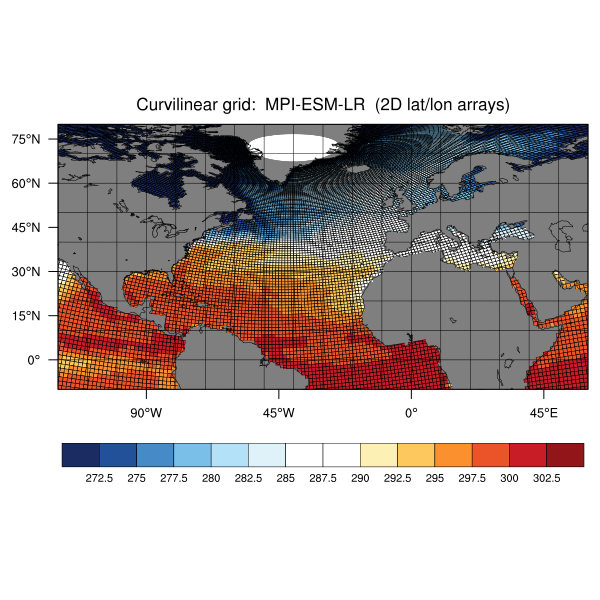

In [6]:
from IPython.display import Image
Image(filename='plot_curvilinear_contour_PyNGL.png') 